<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [30]:
import numpy as np
import matplotlib.pylab as plt 
from math import factorial

In [31]:
print(np.float32(12.123452) - np.float32(12.123450))
diff = np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002

error = abs(diff - valor_real)/valor_real*100
print(error)

#(12.123452/valor_real)*1/(2**31)

1.9073486e-06
4.632568359374996


In [32]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [33]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [34]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [35]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [36]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [37]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [89]:
def exponencial(x, N): # Función de aproximación a 'e^-x' mediante su representación en serie. 
    exp = 0 
    for i in range(N):
        exp += (-1)**i * x**i / factorial(i)
    
    return exp

In [90]:
x = 0.1
N = 100
e_estimado = exponencial(x, N)
e_exacto = np.exp(-x)

print('El valor estimado es: ' ,f'{e_estimado}')
print('El valor de referencia es: ' ,f'{e_exacto}')

El valor estimado es:  0.9048374180359596
El valor de referencia es:  0.9048374180359595


In [91]:
def exponencial_truncado(x, N): # Función que determina la serie de 'e^-x' hasta el punto a partir del cual el sucesor es menor o igual al umbral definido. 
    tresh = abs(1e-7 * e_estimado)
    exp_ = 0
    for i in range(N):
        exp_ = abs((-x)**(i+1) / factorial(i+1))
        if exp_ <= tresh: 
            break
            
    return exponencial(x, i), i


In [92]:
x = 0.1
N = 100
print(f'Valor de la serie: {exponencial(x, N)}')
print(f'Valor de la serie truncada, número de iteraciones: {exponencial_truncado(x, N)}')
print(f'Valor exacto: {e_exacto}')

Valor de la serie: 0.9048374180359596
Valor de la serie truncada, número de iteraciones: (0.9048333333333334, 4)
Valor exacto: 0.9048374180359595


In [93]:
X = 10
N = 100
E_exacto = np.exp(-X)
print(f'Valor de la serie: {exponencial(X, N)}')
print(f'Valor de la serie truncada, número de iteraciones: {exponencial_truncado(X, N)}')
print(f'Valor exacto: {E_exacto}')

Valor de la serie: 4.5399929433607724e-05
Valor de la serie truncada, número de iteraciones: (4.52479139712253e-05, 38)
Valor exacto: 4.5399929762484854e-05


In [94]:
def exponencial_invertida(x, N): # Estimación de 'e^-x' mediante el inverso multiplicativo del
                                 # valor de 'e^x' obtenido a partir de su representación en serie. 
    exp = 0
    for i in range(N):
        exp += x**i / factorial(i)
        
    return 1 / exp

In [95]:
x = 0.1
N = 100
e_exacto = np.exp(-x)
print(f'Valor de la serie: {exponencial(x, N)}')
print(f'Valor de la serie invertida: {exponencial_invertida(x, N)}')
print(f'Valor exacto: {e_exacto}')

Valor de la serie: 0.9048374180359596
Valor de la serie invertida: 0.9048374180359599
Valor exacto: 0.9048374180359595


In [96]:
X = 10
N = 100
E_exacto = np.exp(-X)
print(f'Valor de la serie: {exponencial(X, N)}')
print(f'Valor de la serie invertida: {exponencial_invertida(X, N)}')
print(f'Valor exacto: {E_exacto}')

Valor de la serie: 4.5399929433607724e-05
Valor de la serie invertida: 4.539992976248486e-05
Valor exacto: 4.5399929762484854e-05


In [97]:
N = np.arange(1, 15, 1) 

exp1_ = np.zeros(len(N))
exp2_ = np.zeros(len(N))

for i,n in enumerate(N):
    exp1_[i] = exponencial(x, n)
    exp2_[i] = exponencial_invertida(x, n)


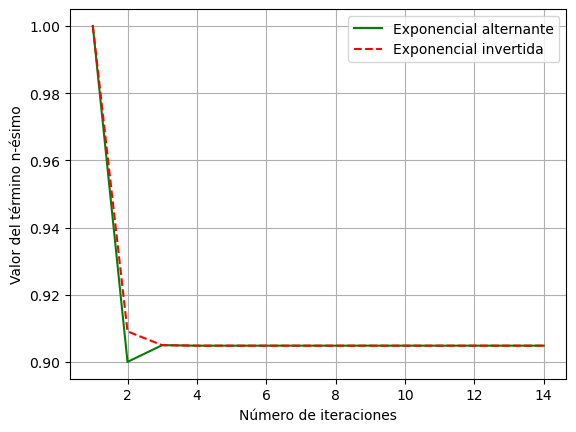

In [98]:
#%matplotlib qt
plt.figure()
plt.plot(N, exp1_, 'g-', label = 'Exponencial alternante')
plt.plot(N, exp2_, 'r--', label = 'Exponencial invertida')
plt.legend()
plt.xlabel('Número de iteraciones')
plt.ylabel('Valor del término n-ésimo')
plt.grid()
plt.show()

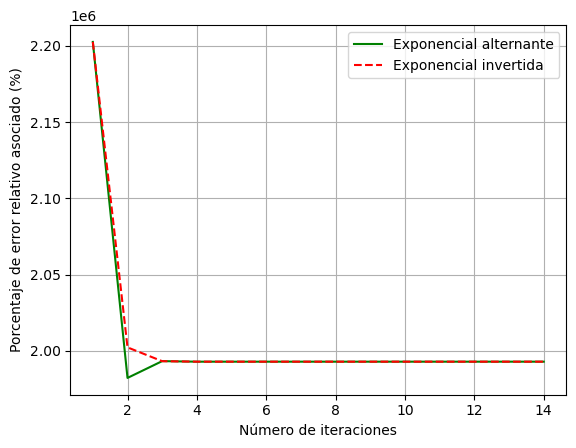

In [99]:
N = np.arange(1, 15, 1) 
x = 10 
exacto = np.exp(-x)
error1 = abs(exp1_ - exacto) / exacto * 100
error2 = abs(exp2_ - exacto) / exacto * 100

plt.figure()
plt.plot(N, error1, 'g-', label = 'Exponencial alternante')
plt.plot(N, error2, 'r--', label = 'Exponencial invertida')
plt.legend()
plt.xlabel('Número de iteraciones')
plt.ylabel('Porcentaje de error relativo asociado (%)')
plt.grid()
plt.show()

In [142]:
N = 1000000
sn1 = 0
sn1_ = np.zeros(2*N+1)
for n in range(1,2*N+1):
    sn1 += (-1)**n * n/(n+1)
    sn1_[n] = sn1
    
sn2 = 0
sn2_ = np.zeros(N)

for m in range(1, N):
    sn2 += 2*m/(2*m+1) - (2*m-1)/(2*m)
    sn2_[m] = sn2
    
sn3 = 0
sn3_ = np.zeros(N)

for k in range(1, N):
    sn3 += 1/(2*k*(2*k+1))
    sn3_[k] = sn3     

N2_ = np.arange(1, 2*N+2)
N_ = np.arange(1, N+1)

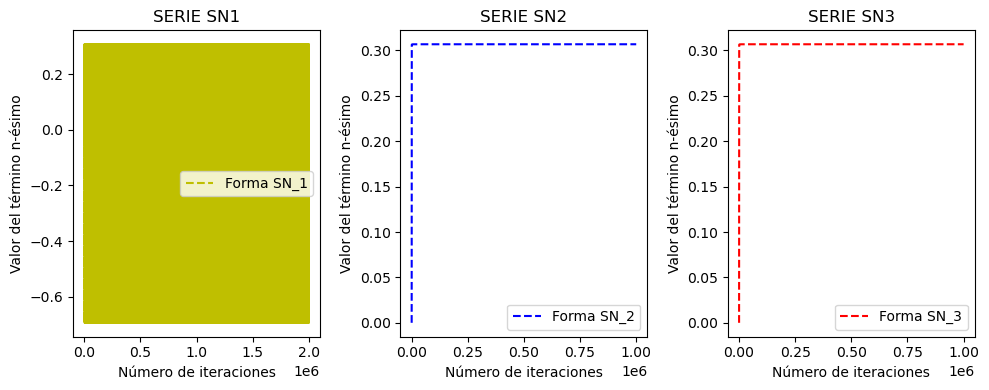

In [143]:
fig, plot = plt.subplots(1, 3, figsize = (10, 4))

plot[0].plot(N2_, sn1_, 'y--', label = 'Forma SN_1')
plot[0].legend()
plot[0].set_title('SERIE SN1')
plot[0].set_xlabel('Número de iteraciones')
plot[0].set_ylabel('Valor del término n-ésimo')

plot[1].plot(N_, sn2_, 'b--', label = 'Forma SN_2')
plot[1].legend()
plot[1].set_title('SERIE SN2')
plot[1].set_xlabel('Número de iteraciones')
plot[1].set_ylabel('Valor del término n-ésimo')

plot[2].plot(N_, sn3_, 'r--', label = 'Forma SN_3')
plot[2].legend()
plot[2].set_title('SERIE SN3')
plot[2].set_xlabel('Número de iteraciones')
plot[2].set_ylabel('Valor del término n-ésimo')

plt.tight_layout()

In [144]:
N_sn1 = np.arange(0, 2*N, 1) 
N_sn2 = np.arange(0, N, 1) 
 
sn_ref = sn3
error_sn1 = np.zeros(2*N)
error_sn2 = np.zeros(N)

for i in range(2*N):
    error_sn1[i] = abs(sn1_[i] - sn_ref / sn_ref)
    
for j in range(N):
    error_sn2[j] = abs(sn2_[j] - sn_ref / sn_ref)


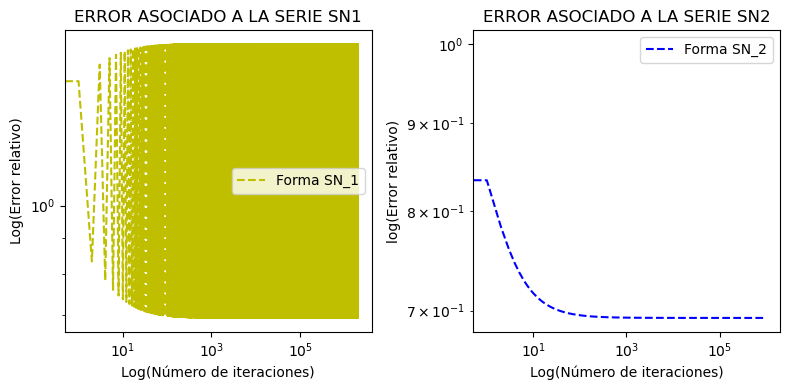

In [145]:
fig, plot = plt.subplots(1, 2, figsize = (8, 4))

plot[0].loglog(N_sn1, error_sn1, 'y--', label = 'Forma SN_1')
plot[0].legend()
plot[0].set_title('ERROR ASOCIADO A LA SERIE SN1')
plot[0].set_xlabel('Log(Número de iteraciones)')
plot[0].set_ylabel('Log(Error relativo)')

plot[1].loglog(N_sn2, error_sn2, 'b--', label = 'Forma SN_2')
plot[1].legend()
plot[1].set_title('ERROR ASOCIADO A LA SERIE SN2')
plot[1].set_xlabel('Log(Número de iteraciones)')
plot[1].set_ylabel('log(Error relativo)')

plt.tight_layout()